In [25]:
from sklearn.datasets import load_sample_image


from inpainting import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
flower_image = load_sample_image("flower.jpg")
flower_image = load_sample_image("china.jpg")

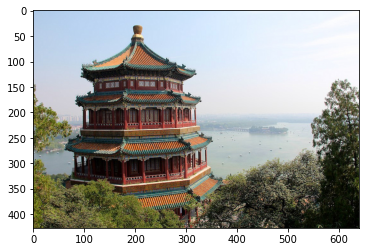

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


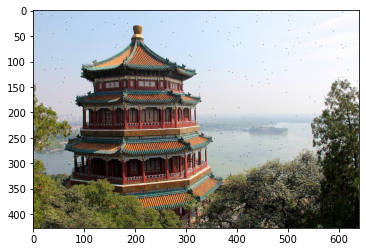

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


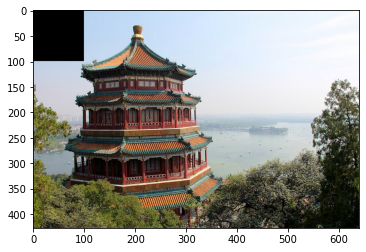

In [3]:
img = change_color(flower_image,"RGB", "HSV")

show_im(change_color(img,"HSV","RGB"))
new_img = noise(img,0.001)
show_im(change_color(new_img,"HSV","RGB"))
new_new_img=delete_rect(img,0,0,100,100)
show_im(change_color(new_new_img,"HSV","RGB"))

In [94]:
from inpainting import *

obj = Inpainting(new_img,patch_size=5)
# obj.inpaint_fit()

In [170]:
X_h, X_s, X_v, y_h, y_s, y_v = obj.get_training_data()

In [178]:
from sklearn.linear_model import Lasso

classifiers_kwaargs = {"alpha": 0.001, "copy_X": True, "fit_intercept": True, "max_iter": 1e3, 
                               "normalize": False, "positive": False, "precompute": False, "random_state": None, 
                               "selection": 'cyclic', "tol": 1e-8, "warm_start": False}
classifier_H = Lasso(**classifiers_kwaargs)

In [180]:
classifier_H.fit(X_h,y_h)

/home/melissa/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001220703125, tolerance: 1.28866713566822e-05
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1e-08, warm_start=False)